In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import random

## Environment

In [ ]:
N = 10 # STATE
GRID = np.zeros((N, N)) # ENVIRONMENT
ACTIONS = ['L', 'R', 'U', 'D', 'S'] # ACTION
TERMINAL = [N-1, N-1]
REWARD = np.zeros((N, N)); # REWARD
REWARD[TERMINAL[0]][TERMINAL[1]] = 1 
GAMMA = 0.9
ALPHA = 0.5

# TRANSITION
def move(state = [0, 0], action = 'S'):
    if state == TERMINAL:
        return state
    if action == 'L':
        state = [ (state[0]-1)%N , state[1] ]
    elif action == 'R':
        state = [ (state[0]+1)%N , state[1] ]
    elif action == 'U':
        state = [ state[0] , (state[1]+1)%N ]
    elif action == 'D':
        state = [ state[0] , (state[1]-1)%N ]
    return state    



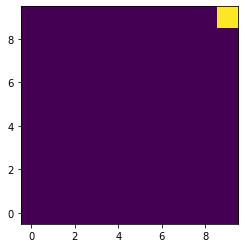

In [ ]:
plt.imshow( REWARD, origin="lower")

## Temporal Difference Learning

In [ ]:
def TDL(epochs):
    V = np.zeros((N, N))
    for _ in range(epochs):
        # START STATE
        si = [0, 0]
        while 1:
            # Monte-Carlo policy
            a = random.choice(ACTIONS)
            # next state <- Action on state si
            sj = move(si, a)
            # UPDATE
            V[si[0]][si[1]] += ALPHA * ( REWARD[si[0]][si[1]] + GAMMA * V[sj[0]][sj[1]] - V[si[0]][si[1]])
            # CHECK
            if si == TERMINAL : 
                break
            # STATE UPDATE
            si = sj
    return V



In [ ]:
value = TDL( 1000 )
print(value)

[[ 3.95367609  1.58479243  0.1983034   0.14164926  0.0791726   0.11631963
   0.29341372  1.72609465  0.64701179  0.9889126 ]
 [ 1.05466559  0.30319524  0.12964152  0.09228437  0.05545416  0.12991938
   0.21671244  0.35940334  0.50422501  0.40817117]
 [ 0.17673596  0.16170159  0.10953322  0.03724144  0.03479687  0.0809899
   0.09467319  0.17213743  0.20530806  0.1087357 ]
 [ 0.10237392  0.10985651  0.04283711  0.03877898  0.03432153  0.0661607
   0.0828686   0.09735561  0.08405978  0.10493519]
 [ 0.10869437  0.0920093   0.07115008  0.04016405  0.03344548  0.04650898
   0.04902941  0.09572317  0.07726036  0.08164508]
 [ 0.14822389  0.28883328  0.07844739  0.04999751  0.05939064  0.04610773
   0.04802564  0.08089148  0.19557731  0.12381219]
 [ 0.20928993  0.40983361  0.28107412  0.10761345  0.06210469  0.06475533
   0.19384655  0.2747844   0.46463241  0.30603886]
 [ 1.40981888  0.50407242  0.25890489  0.18820635  0.12287974  0.1219793
   0.57762787  0.70284754  1.26284114  0.51829061]
 [ 

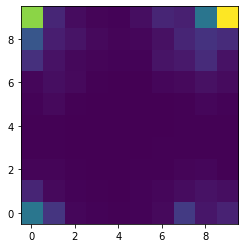

In [ ]:
plt.imshow(value, origin='lower')